In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')

# Basic exploration
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Data cleaning
# Fill missing 'Age' values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
data.drop('Cabin', axis=1, inplace=True)

# Drop the 'Ticket' column as it's unlikely to be useful
data.drop('Ticket', axis=1, inplace=True)

# Feature engineering
# Convert categorical columns to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Create new feature 'FamilySize'
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Drop unused columns
data.drop(['Name', 'PassengerId'], axis=1, inplace=True)

# Split the data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Accuracy: 0.8212290502793296
Confusion Matrix:
[[89 16]
 [16 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



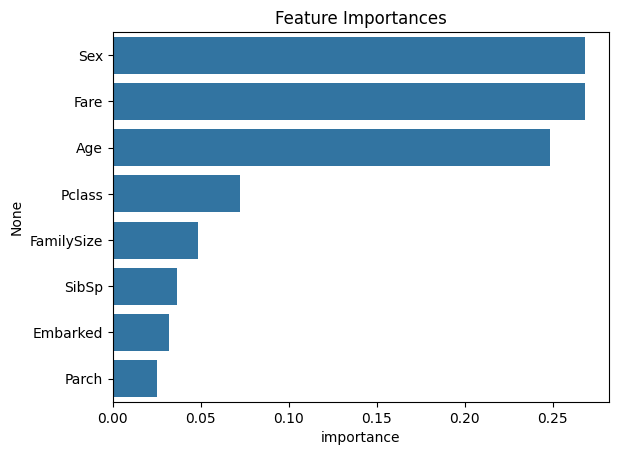

In [4]:
# Plot feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()



In [5]:
# Function to preprocess new data
def preprocess_data(data):
    # Fill missing 'Age' values with the median
    data['Age'].fillna(data['Age'].median(), inplace=True)

    # Fill missing 'Embarked' values with the mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Drop the 'Cabin' column as it has too many missing values
    if 'Cabin' in data.columns:
        data.drop('Cabin', axis=1, inplace=True)

    # Drop the 'Ticket' column as it's unlikely to be useful
    if 'Ticket' in data.columns:
        data.drop('Ticket', axis=1, inplace=True)

    # Convert categorical columns to numerical
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # Create new feature 'FamilySize'
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    # Drop unused columns
    if 'Name' in data.columns:
        data.drop(['Name'], axis=1, inplace=True)
    if 'PassengerId' in data.columns:
        data.drop(['PassengerId'], axis=1, inplace=True)

    return data



In [6]:
# Example new passenger data (replace with your actual data)
new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['male'],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': ['S']
})

# Preprocess the new data
new_data_preprocessed = preprocess_data(new_data)

# Predict survival for the new data
new_prediction = model.predict(new_data_preprocessed)
new_prediction_proba = model.predict_proba(new_data_preprocessed)

print(f'Prediction (0 = Did not survive, 1 = Survived): {new_prediction[0]}')
print(f'Prediction Probability: {new_prediction_proba[0]}')

Prediction (0 = Did not survive, 1 = Survived): 0
Prediction Probability: [0.85 0.15]
